## Lego DataSet Exploratory Data Analysis
### DataSci200 Project 2

# Add explination write up for this section Fix DF issue with widget for imdb_ratings.year


In [1]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import matplotlib.ticker as mticker
import scipy.stats as stat

pd.set_option('display.max_rows', 1000)

In [2]:
# Import Individual Lego DataFrames
sets = pd.read_csv("data/sets.csv.gz")
themes = pd.read_csv("data/themes.csv.gz")
# Import IMDB title data
imdb_titles = pd.read_csv("C:/Users/mhurth/OneDrive - PureWest Energy/Desktop/MIDS/200/title.basics.tsv.gz", sep= "\t")

C:\Users\mhurth\AppData\Local\Temp\2\ipykernel_19672\1123985115.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_titles = pd.read_csv("C:/Users/mhurth/OneDrive - PureWest Energy/Desktop/MIDS/200/title.basics.tsv.gz", sep= "\t")


In [3]:
# Clean Up the IMDB dataset
imdb_titles.replace('\\N', np.nan, inplace=True)
imdb_titles.dropna(subset=["startYear","titleType","primaryTitle", "runtimeMinutes"], inplace=True)
# Filter start year for lego data sets
imdb_titles["startYear"] = imdb_titles["startYear"].astype(int)
imdb_titles = imdb_titles[(imdb_titles["startYear"] >= 1950) & (imdb_titles["startYear"] <= 2022)]
# Filter to only Movies 
imdb_titles = imdb_titles.loc[imdb_titles["titleType"] == "movie"]
# Filter out short films
imdb_titles["runtimeMinutes"] = imdb_titles["runtimeMinutes"].astype(int)
imdb_titles = imdb_titles[imdb_titles["runtimeMinutes"]>=60]

In [4]:
# Clean Up lego Data Sets
# filter to appropriate years
sets = sets.loc[sets.year <= 2022]
# Merging Sets and Themes to look at most common themes over time
sets_and_themes_df = sets.merge(themes, left_on="theme_id", right_on="id", how='left', suffixes=('_set', "_theme"))
sets_and_themes_df = sets_and_themes_df.loc[sets_and_themes_df.year <= 2022]
# Cleaning Sets and Themes by populating parent theme
sets_and_themes_df.parent_id = sets_and_themes_df.parent_id.fillna(sets_and_themes_df.id)
id_themes = sets_and_themes_df[["id","name_theme"]].drop_duplicates()
sets_and_themes_df = sets_and_themes_df.merge(id_themes, left_on="parent_id", right_on="id", how="left", suffixes=("","_parent"))
sets_and_themes_df.drop(columns=["id_parent"],inplace=True)
sets_and_themes_df.rename(columns={"name_theme_parent":"parent_theme"}, inplace=True)
# Handling Nulls in the Parent Theme Name Columns
sets_and_themes_df.loc[sets_and_themes_df.parent_id == 147, "parent_theme"] = "Pirates I, Pirates II, Pirates III"
sets_and_themes_df.loc[sets_and_themes_df.parent_id == 296, "parent_theme"] = "Dino Island, Desert, Orient Expedition, Jungle"
sets_and_themes_df.loc[sets_and_themes_df.parent_id == 561, "parent_theme"] = "The Lord of the Rings, The Hobbit"

In [5]:
sets_and_themes_df.parent_theme.value_counts()

Gear                                              3091
Duplo                                             1261
Star Wars                                          889
Collectible Minifigures                            803
City                                               792
Service Packs                                      781
Town                                               764
Educational and Dacta                              646
Books                                              606
Technic                                            540
Friends                                            501
Ninjago                                            490
System                                             463
Bionicle                                           454
Creator                                            452
Universal Building Set                             411
LEGO Brand Store                                   364
Space                                              334
Seasonal  

#### Movie Related Themes
- Star Wars
- Harry Potter
- Jurassic World
- Batman
- The Hobbit/The Lord of the Rings
- Indiana Jones
- Pirates Of The Caribean
- Minions
- Trolls

In [6]:
# Generated dictionary of theme and blockbuster movie to pass for interactive plotting
franchise_dict = {"Star Wars": {"regex": r'\bstar wars\b', 
                               "movies": ["Star Wars: Episode IV - A New Hope", 
                                          "Star Wars: Episode V - The Empire Strikes Back", 
                                          "Star Wars: Episode VI - Return of the Jedi", 
                                          "Star Wars: Episode I - The Phantom Menace",
                                          "Star Wars: Episode II - Attack of the Clones",
                                          "Star Wars: Episode III - Revenge of the Sith",
                                          "Star Wars: Episode VII - The Force Awakens",
                                          "Star Wars: Episode VIII - The Last Jedi",
                                          "Star Wars: Episode IX - The Rise of Skywalker",
                                          "Solo: A Star Wars Story",
                                          "Rogue One: A Star Wars Story",
                                          "Solo: A Star Wars Story"]},
                  "Harry Potter": {"regex": r'\bharry potter\b', 
                                  "movies":["Harry Potter and the Sorcerer's Stone",
                                            "Harry Potter and the Chamber of Secrets",
                                            "Harry Potter and the Prisoner of Azkaban",
                                            "Harry Potter and the Goblet of Fire",
                                            "Harry Potter and the Order of the Phoenix",
                                            "Harry Potter and the Half-Blood Prince",
                                            "Harry Potter and the Deathly Hallows: Part 1",
                                            "Harry Potter and the Deathly Hallows: Part 2"]},
                 "Jurassic Park": {"regex": r'\bJurassic\b', 
                                  "movies": ["Jurassic Park", 
                                             "The Lost World: Jurassic Park", 
                                             "Jurassic Park III", 
                                             "Jurassic World", 
                                             "Jurassic World: Fallen Kingdom", 
                                             "Jurassic World: Dominion"]},
                  "Batman": {"regex": r'\bbatman\b', 
                                  "movies": ["Batman: The Movie",
                                             "Batman",
                                             "Batman Returns",
                                             "Batman: Mask of the Phantasm",
                                             "Batman Forever",
                                             "Batman & Robin",
                                             "Batman Begins",
                                             "The Dark Knight",
                                             "The Dark Knight Rises",
                                             "Batman v Superman: Dawn of Justice",
                                             "The Lego Batman Movie",
                                             "The Batman"]},
                 "Lord of the Rings": {"regex": r'\bLord of the Rings\b', 
                                       "movies": ["The Hobbit: An Unexpected Journey",
                                                  "The Hobbit: The Desolation of Smaug",
                                                  "The Hobbit: The Battle of the Five Armies",
                                                  "The Lord of the Rings: The Fellowship of the Ring",
                                                  "The Lord of the Rings: The Two Towers",
                                                  "The Lord of the Rings: The Return of the King"]},
                  "Indiana Jones": {"regex": r'\bIndiana Jones\b', 
                                    "movies": ["Raiders of the Lost Ark",
                                               "Indiana Jones and the Temple of Doom",
                                               "Indiana Jones and the Last Crusade",
                                               "Indiana Jones and the Kingdom of the Crystal Skull"]},
                 "Pirates of the Caribbean": {"regex": r'\bPirates of the Caribbean\b',
                                              "movies": ["Pirates of the Caribbean: The Curse of the Black Pearl",
                                                         "Pirates of the Caribbean: Dead Man's Chest",
                                                         "Pirates of the Caribbean: At World's End",
                                                         "Pirates of the Caribbean: On Stranger Tides",
                                                         "Pirates of the Caribbean: Dead Men Tell No Tales"]},
                 "Minions": {"regex": r'\bMinions\b',
                             "movies": ["Minions",
                                        "Minions: The Rise of Gru"]},
                 "Trolls": {"regex": r'\bTrolls\b',
                            "movies": ["Trolls",
                                       "Trolls 2: World Tour"]}}


In [7]:
def null_years_to_zero(df, df_imdb):
    """This function takes the lego data theme count by year and adds zero to years without sets so they van be plotted"""
    min_year = np.min(df_imdb["startYear"])
    max_year = np.max(df_imdb["startYear"])
    df = df.set_index('year')
    df_new = pd.DataFrame({"year":range(min_year-5, min(2022,max_year+5)+1), "set_num": 0}).set_index("year")
    df_new["set_num"]=df["set_num"]
    df_new.fillna(0, inplace=True)
    df_new.reset_index(inplace=True)
    return df_new

In [8]:
def plot_movies_and_lego_sets(lego_df, imdb_df, movie_dict, name):
    """Plotting function to plot the years that movies in a franshise are released 
    and the number of lego sets released for that franchise each year"""
    pattern = movie_dict[name]["regex"]
    movie_list = movie_dict[name]["movies"]
    lego = lego_df.loc[lego_df["parent_theme"].str.contains(pattern, regex=True, case=False)]
    lego = pd.DataFrame(lego.groupby("year")["set_num"].count()).reset_index()
    imdb = imdb_df[imdb_df["primaryTitle"].isin(movie_list)].sort_values(by="startYear").reset_index()
    cmap = plt.cm.get_cmap('tab20', len(imdb))
    fig, ax = plt.subplots()
    for i in range(len(imdb)):
        year = imdb.loc[i, "startYear"]
        title = imdb.loc[i, "primaryTitle"]
        color = cmap(i)
        plt.axvline(x=year, c=color, label=f"{year}: {title}")
    lego = null_years_to_zero(lego, imdb)
    sns.lineplot(data=lego, x="year", y="set_num", marker="o", label="Lego Sets", color ="black")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    yticks = ax.get_yticks()
    ax.yaxis.set_major_locator(mticker.FixedLocator(yticks))
    ax.set_yticklabels([f'{int(tick):.0f}' for tick in yticks])
    plt.ylabel("Number of Sets")
    xticks = ax.get_xticks()
    ax.xaxis.set_major_locator(mticker.FixedLocator(xticks))
    ax.set_xticklabels([f'{int(tick):.0f}' for tick in xticks])
    plt.xlabel("Year")
    plt.title(f"{name} Lego Set and Movie Releases by Year")
    plt.show()

In [9]:
movie_dropdown = widgets.Dropdown(options=list(franchise_dict.keys()), description = "Theme")
def update_plot(name):
    plot_movies_and_lego_sets(sets_and_themes_df, imdb_titles, franchise_dict, name)
widgets.interactive(update_plot, name=movie_dropdown)  

interactive(children=(Dropdown(description='Theme', options=('Star Wars', 'Harry Potter', 'Jurassic Park', 'Ba…

#### Movie Observations
- StarWars - No Lego releases till the second trilogy. Lego continues to release a lot of star wars sets culminating during the third trilogy, episodes 6-9

- Harry Potter - Lego releases were pretty synced up with the movie releases, with the order of the pheonix and half-blood prince being a noticable expception. Lego releases dropped off quickly after movie franchise wrapped up. This franchise in an exception in that they relesed many sets before demonstrating significant success in the film franchise

- Jurassic Park - No lego sets released for first three jurassic parks. Each Jurassic world release has been accompanied by more lego sets

- Indiana Jones - No lego releases for the original three blockbuster hits, with several sets released with the Crystal Skull sequal

- Batman - Lego has never released a batman set in the same year as a batman movie with the exception of the Lego Batman Movie where they released 35 in a single year.

- LOTR - No LOTR lego sets were released during the original trilogy movies. Sets were released every year a hobit movie came out. then stopped releasing after the hobit trilogy ended

- Pirates of the Carribean - No POTC sets releases for the first three movies. 16 sets were released with the 4th movie and 1 was relased for the 5th, then the theme was retired

- Minions - No set were released for the first move. 9 sets released in the two years before the sequal which may have been linked to other media releases

- Trolls - No sets were released with the original blockbuster hit, but 9 sets were released with the sequal

#### Broad Observations
- With the exception of harry potter, Lego did not bet on a movie franchise until it had become a blockbuster hit
- Before the 2000's Lego didn't pair their set themes with movie franchises nearly as much. 

In [10]:
# Import IMDB rating data
imdb_ratings = pd.read_csv("C:/Users/mhurth/OneDrive - PureWest Energy/Desktop/MIDS/200/title.ratings.tsv.gz", sep= "\t")

In [11]:
# Merge Rating For Franchise Films with lego sets data
movies_list = []
for key in franchise_dict.keys():
    movies_list.extend(franchise_dict[key]["movies"])
id_list_for_franchise_movies = imdb_titles[imdb_titles["primaryTitle"].isin(movies_list)]["tconst"].unique()
imdb_ratings = imdb_ratings[imdb_ratings["tconst"].isin(id_list_for_franchise_movies)]
imdb_ratings = pd.merge(imdb_ratings, imdb_titles, how="left", on="tconst")
imdb_ratings

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0060153,6.5,34288,movie,Batman,Batman: The Movie,0,1966,NaN,105,"Action,Adventure,Comedy"
1,tt0076759,8.6,1383623,movie,Star Wars: Episode IV - A New Hope,Star Wars,0,1977,NaN,121,"Action,Adventure,Fantasy"
2,tt0080684,8.7,1311257,movie,Star Wars: Episode V - The Empire Strikes Back,The Empire Strikes Back,0,1980,NaN,124,"Action,Adventure,Fantasy"
3,tt0082971,8.4,980008,movie,Raiders of the Lost Ark,Raiders of the Lost Ark,0,1981,NaN,115,"Action,Adventure"
4,tt0086190,8.3,1069281,movie,Star Wars: Episode VI - Return of the Jedi,Star Wars: Episode VI - Return of the Jedi,0,1983,NaN,131,"Action,Adventure,Fantasy"
5,tt0087469,7.5,499890,movie,Indiana Jones and the Temple of Doom,Indiana Jones and the Temple of Doom,0,1984,NaN,118,"Action,Adventure"
6,tt0096895,7.5,384738,movie,Batman,Batman,0,1989,NaN,126,"Action,Adventure"
7,tt0097576,8.2,766292,movie,Indiana Jones and the Last Crusade,Indiana Jones and the Last Crusade,0,1989,NaN,127,"Action,Adventure"
8,tt0103776,7.1,311825,movie,Batman Returns,Batman Returns,0,1992,NaN,126,"Action,Crime,Fantasy"
9,tt0106364,7.8,53042,movie,Batman: Mask of the Phantasm,Batman: Mask of the Phantasm,0,1993,NaN,76,"Action,Adventure,Animation"


In [12]:
def plot_movie_ratings_and_lego_sets(lego_df, imdb_df, movie_dict, name):
    """Plotting function to plot the years that movies in a franshise are released 
    and the number of lego sets released for that franchise each year"""
    pattern = movie_dict[name]["regex"]
    movie_list = movie_dict[name]["movies"]
    lego = lego_df.loc[lego_df["parent_theme"].str.contains(pattern, regex=True, case=False)]
    lego = pd.DataFrame(lego.groupby("year")["set_num"].count()).reset_index()
    imdb = imdb_df[imdb_df["primaryTitle"].isin(movie_list)].sort_values(by="startYear").reset_index()
    cmap = plt.cm.get_cmap('tab20', len(imdb))
    fig, ax1 = plt.subplots()
    lego = null_years_to_zero(lego, imdb)
    sns.lineplot(data=lego, x="year", y="set_num", marker="o", label="Lego Set Count", color ="black", ax=ax1)
    plt.xlabel("Year")
    ax1.legend(loc='center left', bbox_to_anchor=(1.1, .1))
    yticks = ax1.get_yticks()
    ax1.yaxis.set_major_locator(mticker.FixedLocator(yticks))
    ax1.set_yticklabels([f'{int(tick):.0f}' for tick in yticks])
    ax1.set_ylabel("Number of Sets")
    xticks = ax1.get_xticks()
    ax1.xaxis.set_major_locator(mticker.FixedLocator(xticks))
    ax1.set_xticklabels([f'{int(tick):.0f}' for tick in xticks])
    ax2 = ax1.twinx()
    for i in range(len(imdb)):
        year = imdb.loc[i, "startYear"]
        title = imdb.loc[i, "primaryTitle"]
        rating = imdb.loc[i, "averageRating"]
        color = cmap(i)
        plt.axvline(x=year, c=color, linestyle='--', linewidth=0.5)
        plt.plot([year], [rating], color=color, marker="*", ls='none', ms=10, label=f"Rating:{rating}/10 Stars; {title} ")
    ax2.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
    ax2.set_ylim(0,10)
    ax2.set_ylabel("IMDB Rating")
    plt.title(f"{name} Lego Set and Movie Releases by Year")
    plt.show()

In [13]:
def update_plot(name):
    plot_movie_ratings_and_lego_sets(sets_and_themes_df, imdb_ratings, franchise_dict, name)
widgets.interactive(update_plot, name=movie_dropdown)

interactive(children=(Dropdown(description='Theme', index=3, options=('Star Wars', 'Harry Potter', 'Jurassic P…

In [14]:
sets_and_themes_df["franchise"]=None
imdb_ratings["franchise"]=None
for key in franchise_dict.keys():
    sets_and_themes_df.loc[sets_and_themes_df["parent_theme"].str.contains(franchise_dict[key]["regex"], regex=True, case=False), "franchise"] = key
    imdb_ratings.loc[imdb_ratings["primaryTitle"].isin(franchise_dict[key]["movies"]), "franchise"] = key
imdb_ratings.rename(columns={"startYear":"year"}, inplace=True)
imdb_ratings["year"] = imdb_ratings["year"].astype("int64")
lego_sets_year_franchise = pd.DataFrame(sets_and_themes_df.groupby(["year","franchise"])["set_num"].count()).reset_index()
imdb_ratings = pd.merge(imdb_ratings, lego_sets_year_franchise, on=["year", "franchise"], how='left')
imdb_ratings["set_num"] = imdb_ratings["set_num"].fillna(0)

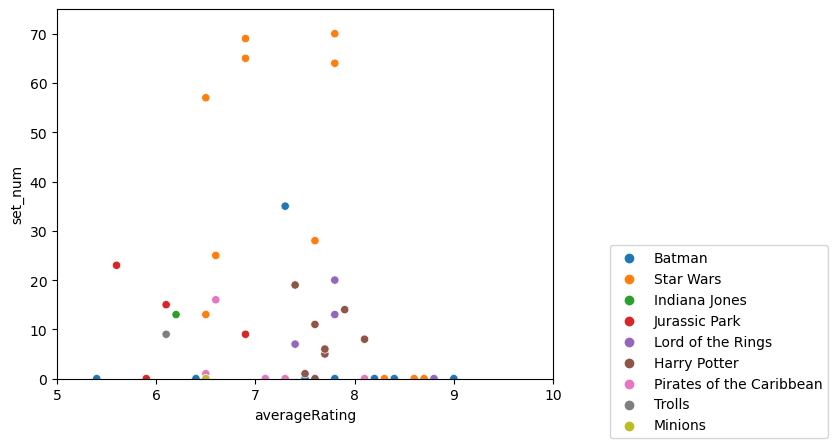

In [15]:
fig, ax = plt.subplots()
sns.scatterplot(data=imdb_ratings, x="averageRating", y="set_num", hue="franchise", ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1.1, .1))
ax.set_ylim(0,75)
ax.set_xlim(5,10)
plt.show()

In [16]:
def plot_ratings_vs_themes_by_year(ratings_df, name):
    fig, ax = plt.subplots()
    franchise_ratings = ratings_df.loc[ratings_df["franchise"] == name] 
    franchise_ratings = franchise_ratings[["averageRating", "set_num", "primaryTitle"]].dropna()
    sns.regplot(data=franchise_ratings, x="averageRating", y="set_num", scatter=False)
    sns.scatterplot(data=franchise_ratings, x="averageRating", y="set_num", hue="primaryTitle")
    try:
        r, p = stat.pearsonr(franchise_ratings["averageRating"], franchise_ratings["set_num"])
        plt.gca()
        ax.text(.7, .05, f'r={r:.2f}, p={p:.2g}', transform=ax.transAxes)
    except:
        plt.gca()
        ax.text(.5, .05, 'No R2 without two points', transform=ax.transAxes)
    ax.set_ylim(0)
    ax.set_xlim(5,10)
    ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
    ax.set_xlabel("Average Star out of 10")
    ax.set_ylabel("Number of Sets Released Same Year")
    plt.show()

In [17]:
def update_plot(name):
    plot_ratings_vs_themes_by_year(imdb_ratings, name)
widgets.interactive(update_plot, name=movie_dropdown)

interactive(children=(Dropdown(description='Theme', index=2, options=('Star Wars', 'Harry Potter', 'Jurassic P…